<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/InceptionV3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train'
valid_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation'


In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2263 images belonging to 4 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 2018s 41s/step - loss: 7.3562 - accuracy: 0.3179 - val_loss: 3.3688 - val_accuracy: 0.4547
Epoch 2/10
50/50 [==============================] - 768s 16s/step - loss: 2.7714 - accuracy: 0.5323 - val_loss: 2.5724 - val_accuracy: 0.5360
Epoch 3/10
50/50 [==============================] - 789s 16s/step - loss: 2.9198 - accuracy: 0.5536 - val_loss: 2.5739 - val_accuracy: 0.5714
Epoch 4/10
50/50 [==============================] - 785s 16s/step - loss: 2.1585 - accuracy: 0.6141 - val_loss: 2.3962 - val_accuracy: 0.5634
Epoch 5/10
50/50 [==============================] - 788s 16s/step - loss: 1.8788 - accuracy: 0.6462 - val_loss: 2.6536 - val_accuracy: 0.5656
Epoch 6/10
50/50 [==============================] - 774s 16s/step - loss: 2.2351 - accuracy: 0.6234 - val_loss: 2.1587 - val_accuracy: 0.6602
Epoch 7/10
50/50 [==============================] - 787s 16s/step - loss: 2.3796 - accuracy: 0.6432 - val_loss: 6.3220 - val_accuracy: 0.4777
Epoch

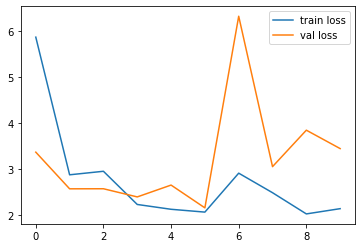

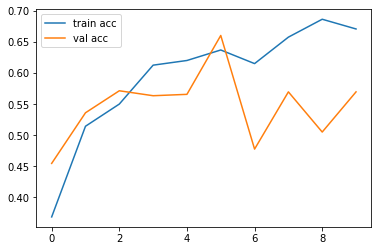

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('ricemodel_inception.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[9.9999118e-01, 8.8002116e-06, 2.2937242e-10, 4.7175657e-08],
       [3.7462852e-11, 1.6624754e-09, 1.0000000e+00, 1.8577914e-08],
       [2.1255718e-01, 7.3209488e-01, 5.2609935e-02, 2.7379643e-03],
       ...,
       [1.5966050e-05, 4.0262246e-05, 9.5225018e-01, 4.7693629e-02],
       [4.7811241e-11, 1.1201047e-14, 8.4792286e-05, 9.9991524e-01],
       [9.9784315e-01, 8.7614430e-11, 7.2217077e-10, 2.1568821e-03]],
      dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 2, 1, ..., 2, 3, 0])

In [59]:
img=image.load_img('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled/BrownSpot/IMG_20190419_103531.jpg',target_size=(224,224))

In [60]:
x=image.img_to_array(img)
x

array([[[106., 123.,  29.],
        [114., 131.,  37.],
        [116., 132.,  43.],
        ...,
        [208., 206., 230.],
        [214., 212., 236.],
        [207., 205., 227.]],

       [[ 72.,  88.,   0.],
        [122., 139.,  43.],
        [120., 138.,  38.],
        ...,
        [197., 195., 217.],
        [217., 215., 237.],
        [207., 205., 229.]],

       [[111., 129.,  27.],
        [110., 128.,  28.],
        [133., 150.,  54.],
        ...,
        [211., 209., 233.],
        [203., 201., 223.],
        [208., 206., 230.]],

       ...,

       [[235., 233., 255.],
        [238., 237., 255.],
        [230., 230., 254.],
        ...,
        [212., 215., 246.],
        [215., 218., 249.],
        [214., 217., 248.]],

       [[228., 225., 252.],
        [228., 225., 252.],
        [225., 222., 249.],
        ...,
        [215., 218., 249.],
        [215., 222., 251.],
        [211., 218., 247.]],

       [[236., 234., 255.],
        [233., 231., 255.],
        [229., 2

In [61]:
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

array([[0.01393692, 0.00187023, 0.0021348 , 0.98205805]], dtype=float32)

In [65]:

a=np.argmax(model.predict(img_data), axis=1)

In [66]:
a==3

array([ True])